# データの読み込み

銀行の定期預金契約をテレマーケティングで実施

新規顧客獲得のために成功率を上げたい

In [2]:
# データの読み込み

import pandas as pd

datafile = 'bank-revised.csv'
bank_df = pd.read_csv(datafile)
print(bank_df.head())

# 最初の5件でも欠損値(NaN)があるのがわかる

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day month  duration  campaign  pdays  previous poutcome   y  
0     NaN    5   may       261         1     -1         0      NaN  no  
1     NaN    5   may       151         1     -1         0      NaN  no  
2     NaN    5   may        76         1     -1         0      NaN  no  
3     NaN    5   may        92         1     -1         0      NaN  no  
4     NaN    5   may       198         1     -1         0      NaN  no  


In [3]:
# データの件数と項目数をチェック

print(bank_df.shape)

(45211, 17)


In [4]:
# データ型

print(bank_df.dtypes)

# 年齢や年間平均残高のような整数値はint64型
# それ以外の文字列が値となるような項目はobject型

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


#### 欠損値(NaN)の確認

In [5]:
# 行方向(顧客ごと)でのNaNのチェック

print(bank_df.isnull().any(axis=1))

0         True
1         True
2         True
3         True
4         True
         ...  
45206     True
45207     True
45208    False
45209     True
45210    False
Length: 45211, dtype: bool


In [6]:
# 列方向(項目ごと)でのNaNのチェック

print(bank_df.isnull().any(axis=0))

# 職種，学歴，連絡手段，前回の接触での成否にNaNが存在

age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool


In [7]:
# 行方向にNaNの数をチェック

print(bank_df.isnull().sum(axis=1))

0        2
1        2
2        2
3        3
4        4
        ..
45206    1
45207    1
45208    0
45209    1
45210    0
Length: 45211, dtype: int64


In [8]:
# 列方向にNaNの数をチェック

print(bank_df.isnull().sum(axis=0))

# 連絡手段と前回の接触での成否にNaNが非常に多い

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


#### 統計量の計算

データ型がint64のもののみが対象

平均値(mean)/標準偏差(std)/最小値(min)/第一四分位数(25%)/中央値(50%)/第三四分位数(75%)/最大値(max)を算出

In [9]:
# 統計量はdescribeで一発計算

bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### データの可視化

Text(0, 0.5, 'count')

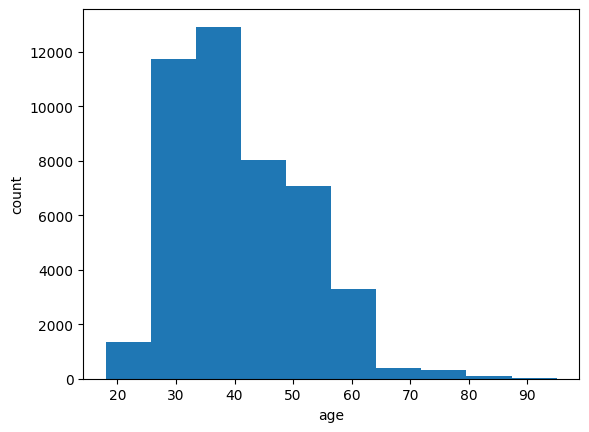

In [10]:
# 年齢のヒストグラム

import matplotlib.pyplot as plt

plt.hist(bank_df['age'])
plt.xlabel('age')
plt.ylabel('count')
    
# 右の裾が長いデータ

              age   balance
age      1.000000  0.097783
balance  0.097783  1.000000


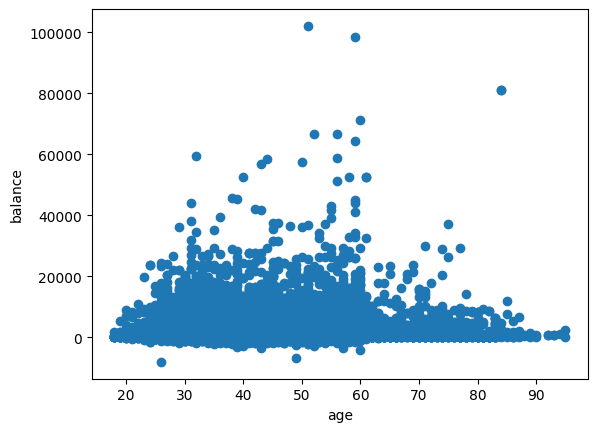

In [11]:
# 年齢と年間平均残高の散布図

plt.scatter(bank_df['age'], bank_df['balance'])
plt.xlabel('age')
plt.ylabel('balance')

# Pearson相関係数の計算

print(bank_df[['age', 'balance']].corr())

# 対角成分でないところが相関係数

In [12]:
# jobの割合

print(bank_df['job'].value_counts(ascending=False, normalize=True))

job
blue-collar      0.216637
management       0.210538
technician       0.169112
admin.           0.115108
services         0.092469
retired          0.050397
self-employed    0.035149
entrepreneur     0.033101
unemployed       0.029005
housemaid        0.027603
student          0.020880
Name: proportion, dtype: float64


(np.float64(-1.0999997124659768),
 np.float64(1.0999999863079037),
 np.float64(-1.0999996424471532),
 np.float64(1.0999929727587625))

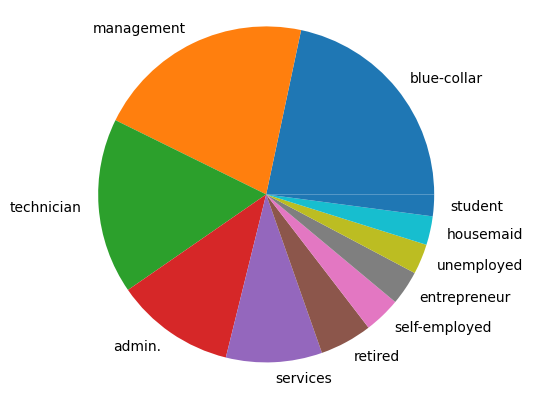

In [13]:
# 円グラフにしてみる

job_label = bank_df['job'].value_counts(ascending=False, normalize=True).index
job_vals = bank_df['job'].value_counts(ascending=False, normalize=True).values

plt.pie(job_vals, labels=job_label)
plt.axis('equal')

(np.float64(-1.0999999974626968),
 np.float64(1.099999999879176),
 np.float64(-1.099999786804752),
 np.float64(1.099999769090376))

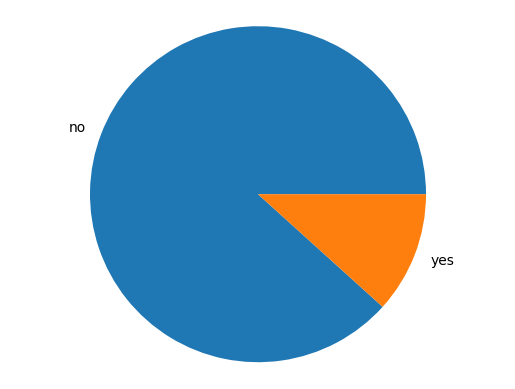

In [14]:
# 目的変数yの円グラフ

y_label = bank_df['y'].value_counts(ascending=False, normalize=True).index
y_vals = bank_df['y'].value_counts(ascending=False, normalize=True).values

plt.pie(y_vals, labels=y_label)
plt.axis('equal')

[Text(1, 0, 'yes'), Text(2, 0, 'no')]

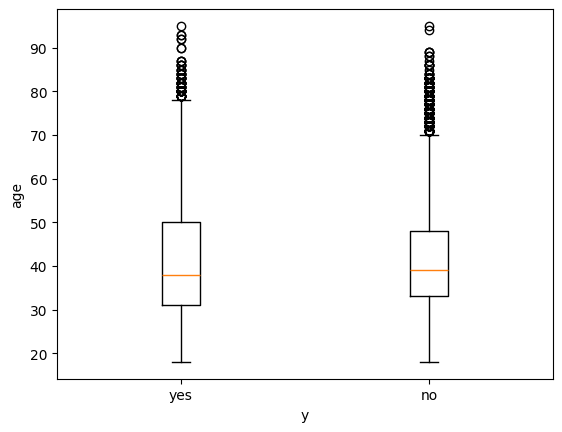

In [15]:
# ageの分布を箱ひげ図に
# yがyesかnoかで分ける

y_yes = bank_df[bank_df['y']=='yes']
y_no = bank_df[bank_df['y']=='no']
y_age = [y_yes['age'], y_no['age']]

plt.boxplot(y_age)
plt.xlabel('y')
plt.ylabel('age')
ax = plt.gca()
plt.setp(ax, xticklabels=['yes', 'no'])

### データの前処理

#### 欠損値(NaN)の除外

In [16]:
# データ読み込み

import pandas as pd

bank_df = pd.read_csv('bank-revised.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [17]:
# データ件数の確認

print(bank_df.shape)

(45211, 17)


In [18]:
# データ型の確認

print(bank_df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


#### 欠損値の除外

In [19]:
# jobやeducationはNaNの件数が少ない
# そこでjobやeducationがNaNのデータは除外

bank_df = bank_df.dropna(subset=['job', 'education'])
print(bank_df.shape)

# 件数が少し減った

(43193, 17)


In [20]:
# poutcomeはNaNの件数が多すぎる
# そこでpoutcome自体をデータフレームから除外

bank_df = bank_df.drop('poutcome', axis=1)
print(bank_df.shape)

# 項目が1つ減っている

(43193, 16)


#### 欠損値の補完

In [21]:
# contactのNaNは"接触の手段が不明"ということだろう
# そこでcontactのNaNは'unknown'という値に置換

bank_df = bank_df.fillna({'contact': 'unknown'})
bank_df.head()

# contactのNaNがunknownに

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,no


#### 外れ値の除外

ageが80を超えているデータは除外

In [22]:
# 80歳以下の人のデータだけを残す

bank_df = bank_df[bank_df['age']<=80]
print(bank_df.shape)

(43105, 16)


#### 文字列データの数値への変換

ex1. defaultやhousing，loan，yはyesとnoの2値を取っている

そこでyes→1，no→0と数値に変換

In [23]:
# yes/noを1/0に変換

bank_df = bank_df.replace('yes', 1)
bank_df = bank_df.replace('no', 0)

bank_df.head()

/var/folders/wx/3cd8vjs575x297gr56v07qlm0000gn/T/ipykernel_25716/1607737107.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_df = bank_df.replace('no', 0)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,0


ex2. job，marital，education，contact，monthは文字列型で様々な値を取る

こういうときにはダミー変数化が有効

In [24]:
# まずはjobをダミー変数化

bank_df_job = pd.get_dummies(bank_df['job'])
bank_df_job.head()

# 0番目の人のjobはmanagementなのでその項目だけTrueで他はFalse
# 1番目の人のjobはtechnicianなのでそこだけTrueで他はFalse
# この要領でその項目が取り得る値の分だけ変数を用意してTrue/Falseの値を設定

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False,False,False,False
6,False,False,False,False,True,False,False,False,False,False,False


In [25]:
# maritalをダミー変数化

bank_df_marital = pd.get_dummies(bank_df['marital'])
bank_df_marital.head()

,divorced,married,single
0,False,True,False
1,False,False,True
2,False,True,False
5,False,True,False
6,False,False,True


In [26]:
# educationをダミー変数化

bank_df_education = pd.get_dummies(bank_df['education'])
bank_df_education.head()

,primary,secondary,tertiary
0,False,False,True
1,False,True,False
2,False,True,False
5,False,False,True
6,False,False,True


In [27]:
# contactをダミー変数化

bank_df_contact = pd.get_dummies(bank_df['contact'])
bank_df_contact.head()

,cellular,telephone,unknown
0,False,False,True
1,False,False,True
2,False,False,True
5,False,False,True
6,False,False,True


In [28]:
# 最後にmonthをダミー変数化

bank_df_month = pd.get_dummies(bank_df['month'])
bank_df_month.head()

# 当然12個の変数が作成される
# 辞書順なので月の順に並ばないのは御愛嬌

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False
5,False,False,False,False,False,False,False,False,True,False,False,False
6,False,False,False,False,False,False,False,False,True,False,False,False


#### データの結合

同じID(今回のケースでは左端の番号)でデータをつなぎ合わせる

In [29]:
# データフレームから数値データのみを抽出

tmp1 = bank_df[['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']]
tmp1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,44,0,29,1,0,5,151,1,-1,0,0
2,33,0,2,1,1,5,76,1,-1,0,0
5,35,0,231,1,0,5,139,1,-1,0,0
6,28,0,447,1,1,5,217,1,-1,0,0


In [30]:
# ダミー変数化したデータを次々と結合

tmp2 = pd.concat([tmp1, bank_df_job], axis=1)
tmp3 = pd.concat([tmp2, bank_df_marital], axis=1)
tmp4 = pd.concat([tmp3, bank_df_education], axis=1)
tmp5 = pd.concat([tmp4, bank_df_contact], axis=1)
bank_df_new = pd.concat([tmp5, bank_df_month], axis=1)
bank_df_new.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
5,35,0,231,1,0,5,139,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
6,28,0,447,1,1,5,217,1,-1,0,...,False,False,False,False,False,False,True,False,False,False


In [31]:
# データを一旦保存

bank_df_new.to_csv('bank-prep.csv', index=False)

### 予測モデルの作成

In [32]:
# データの読み込み

import pandas as pd

bank_df = pd.read_csv('bank-prep.csv')
bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
3,35,0,231,1,0,5,139,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
4,28,0,447,1,1,5,217,1,-1,0,...,False,False,False,False,False,False,True,False,False,False


#### 不均衡データの取り扱い

今回の目的変数yはnoが圧倒的に多い

これで予測モデルを作成するとnoとばかり予測するモデルが出来がち

だからnoの分量を減らした訓練データセットを作成してみる (アンダーサンプリング)

In [33]:
# アンダーサンプリングの実行

import numpy as np
import random

X = np.array(bank_df.drop('y', axis=1))
y = np.array(bank_df[['y']])

print("original data: True {0:d} False {1:d}".format(np.sum(y==True), np.sum(y==False)))

positive_samples = np.sum(y==True)
y_positive = np.where(y==True)
y_negative = np.where(y==False)
random.seed(42)
random.shuffle(y_negative[0])
negative_indice = list(y_negative[0])[:positive_samples]

X_new = X[y_positive[0]]
y_new = y[y_positive[0]]

for index in negative_indice:
    X_new = np.vstack((X_new, X[index]))
    y_new = np.vstack((y_new, y[index]))

print("under-sampled data: True {0:d} False {1:d}".format(np.sum(y_new==True), np.sum(y_new==False)))

original data: True 4982 False 38123
under-sampled data: True 4982 False 4982


#### 決定木モデルの構築と性能評価

In [34]:
# 決定木による予測モデルの構築

from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = []

for train_id, test_id in kf.split(X_new):
    X = X_new[train_id]
    y = y_new[train_id]
    
    clf = DecisionTreeClassifier()
    clf.fit(X, y)
    
    pred_y = clf.predict(X_new[test_id])
    score = accuracy_score(y_new[test_id], pred_y)
    scores.append(score)
    
scores = np.array(scores)
print("Avereage: {0:.4f} Standard Deviation: {1:.4f}".format(scores.mean(), scores.std()))

Avereage: 0.8012 Standard Deviation: 0.0103


In [35]:
# RecallとPrecisionもチェック
# ↑の最後のデータ分割で計算

from sklearn.metrics import recall_score, precision_score

print("Precision: {0:.4f} Recall: {1:.4f}".format(precision_score(y_new[test_id], pred_y), recall_score(y_new[test_id], pred_y)))

Precision: 0.8043 Recall: 0.7775


#### 決定木のハイパーパラメータの最適化

In [36]:
# 決定木のハイパーパラメータのデフォルト設定

import sklearn

sklearn.set_config(print_changed_only=False)
print(clf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')


In [37]:
# 分割の指標(criterion)をentropyに設定
# 決定木の最大の深さ(max_depth)を2, 4, 6, 8, 10から選ぶ
# 葉の最小データ数(min_samples_leaf)を10, 20, 30, 40, 50から選ぶ
# max_depthとmin_samples_leafの全組み合わせのうち最も性能が良いものをチョイス

from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [10, 20, 30, 40, 50]
}

# 性能評価は正解率を採用

clf_gs = GridSearchCV(DecisionTreeClassifier(), params, cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')

clf_gs.fit(X_new, y_new)

# 指標とパラメータの確認

print("{0:.4f}".format(clf_gs.best_score_))
print(clf_gs.best_params_)

0.8257
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20}


In [38]:
# 説明変数のうちyes/noの識別に寄与したものをリストアップ

clf_best = DecisionTreeClassifier(**clf_gs.best_params_)
clf_best.fit(X_new, y_new)

columns = list(bank_df.columns)
columns.remove('y')
for i in range(len(columns)):
    print("{0:s}: {1:.4f}".format(columns[i], clf_best.feature_importances_[i]))
    
# duration(接触した秒数)が識別に相当強く影響している

age: 0.0197
default: 0.0000
balance: 0.0196
housing: 0.0431
loan: 0.0036
day: 0.0424
duration: 0.4742
campaign: 0.0118
pdays: 0.0815
previous: 0.0043
admin.: 0.0005
blue-collar: 0.0004
entrepreneur: 0.0000
housemaid: 0.0000
management: 0.0026
retired: 0.0000
self-employed: 0.0000
services: 0.0000
student: 0.0000
technician: 0.0000
unemployed: 0.0000
divorced: 0.0000
married: 0.0020
single: 0.0021
primary: 0.0012
secondary: 0.0007
tertiary: 0.0003
cellular: 0.0044
telephone: 0.0000
unknown: 0.1286
apr: 0.0114
aug: 0.0192
dec: 0.0000
feb: 0.0062
jan: 0.0077
jul: 0.0274
jun: 0.0237
mar: 0.0126
may: 0.0290
nov: 0.0158
oct: 0.0000
sep: 0.0043


### 特徴量の再検討

In [39]:
# 改めて元のデータ読み込み

import pandas as pd

bank_df = pd.read_csv('bank-prep.csv')
bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
3,35,0,231,1,0,5,139,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
4,28,0,447,1,1,5,217,1,-1,0,...,False,False,False,False,False,False,True,False,False,False


#### 職に就いているかどうかで分類

In [40]:
# management/technician/blue-collar/admin./services/self-employed/entrepreneur/housemaidがTrueの人をまとめてworkerに

bank_df.loc[(bank_df['management']==True) |
           (bank_df['technician']==True) |
           (bank_df['blue-collar']==True) |
           (bank_df['admin.']==True) |
           (bank_df['services']==True) |
           (bank_df['self-employed']==True) |
           (bank_df['entrepreneur']==True) |
           (bank_df['housemaid']==True), 'job2'] = 'worker'

bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,feb,jan,jul,jun,mar,may,nov,oct,sep,job2
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,False,False,True,False,False,False,worker
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,False,False,True,False,False,False,worker
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,False,False,True,False,False,False,worker
3,35,0,231,1,0,5,139,1,-1,0,...,False,False,False,False,False,True,False,False,False,worker
4,28,0,447,1,1,5,217,1,-1,0,...,False,False,False,False,False,True,False,False,False,worker


In [41]:
# retired/unemployed/studentがTrueをまとめてnon-workerに

bank_df.loc[(bank_df['retired']==True) |
           (bank_df['unemployed']==True) |
           (bank_df['student']==True), 'job2'] = 'non-worker'

bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,feb,jan,jul,jun,mar,may,nov,oct,sep,job2
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,False,False,True,False,False,False,worker
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,False,False,True,False,False,False,worker
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,False,False,True,False,False,False,worker
3,35,0,231,1,0,5,139,1,-1,0,...,False,False,False,False,False,True,False,False,False,worker
4,28,0,447,1,1,5,217,1,-1,0,...,False,False,False,False,False,True,False,False,False,worker


In [42]:
# jobに関するダミー変数はすべて削除

bank_df = bank_df.drop(columns=['management', 'technician', 'blue-collar', 'admin.', 'services', 'self-employed', 'entrepreneur', 'housemaid', 'retired', 'unemployed', 'student'])

bank_df.head()

# columns数が減っている

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,feb,jan,jul,jun,mar,may,nov,oct,sep,job2
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,False,False,True,False,False,False,worker
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,False,False,True,False,False,False,worker
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,False,False,True,False,False,False,worker
3,35,0,231,1,0,5,139,1,-1,0,...,False,False,False,False,False,True,False,False,False,worker
4,28,0,447,1,1,5,217,1,-1,0,...,False,False,False,False,False,True,False,False,False,worker


In [43]:
# 月のデータを四半期に分類
# 最初に1-3月(jan/feb/mar)を1Qに設定

bank_df.loc[(bank_df['jan']==True) |
           (bank_df['feb']==True) |
           (bank_df['mar']==True), 'month2'] = '1Q'

bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jan,jul,jun,mar,may,nov,oct,sep,job2,month2
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,False,True,False,False,False,worker,NaN
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,False,True,False,False,False,worker,NaN
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,False,True,False,False,False,worker,NaN
3,35,0,231,1,0,5,139,1,-1,0,...,False,False,False,False,True,False,False,False,worker,NaN
4,28,0,447,1,1,5,217,1,-1,0,...,False,False,False,False,True,False,False,False,worker,NaN


In [44]:
# 4-6月(apr/may/jun)を2Qに

bank_df.loc[(bank_df['apr']==True) |
           (bank_df['may']==True) |
           (bank_df['jun']==True), 'month2'] = '2Q'

bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jan,jul,jun,mar,may,nov,oct,sep,job2,month2
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,False,True,False,False,False,worker,2Q
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,False,True,False,False,False,worker,2Q
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,False,True,False,False,False,worker,2Q
3,35,0,231,1,0,5,139,1,-1,0,...,False,False,False,False,True,False,False,False,worker,2Q
4,28,0,447,1,1,5,217,1,-1,0,...,False,False,False,False,True,False,False,False,worker,2Q


In [45]:
# 7-9月(jul/aug/sep)を3Qに

bank_df.loc[(bank_df['jul']==True) |
           (bank_df['aug']==True) |
           (bank_df['sep']==True), 'month2'] = '3Q'

bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jan,jul,jun,mar,may,nov,oct,sep,job2,month2
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,False,True,False,False,False,worker,2Q
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,False,True,False,False,False,worker,2Q
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,False,True,False,False,False,worker,2Q
3,35,0,231,1,0,5,139,1,-1,0,...,False,False,False,False,True,False,False,False,worker,2Q
4,28,0,447,1,1,5,217,1,-1,0,...,False,False,False,False,True,False,False,False,worker,2Q


In [46]:
# 10-12月(oct/nov/dec)を4Qに

bank_df.loc[(bank_df['oct']==True) |
           (bank_df['nov']==True) |
           (bank_df['dec']==True), 'month2'] = '4Q'

bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jan,jul,jun,mar,may,nov,oct,sep,job2,month2
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,False,True,False,False,False,worker,2Q
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,False,True,False,False,False,worker,2Q
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,False,True,False,False,False,worker,2Q
3,35,0,231,1,0,5,139,1,-1,0,...,False,False,False,False,True,False,False,False,worker,2Q
4,28,0,447,1,1,5,217,1,-1,0,...,False,False,False,False,True,False,False,False,worker,2Q


In [47]:
# 月に関するダミー変数を削除

bank_df = bank_df.drop(columns=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

bank_df.head()

# columns数がさらに減少

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,married,single,primary,secondary,tertiary,cellular,telephone,unknown,job2,month2
0,58,0,2143,1,0,5,261,1,-1,0,...,True,False,False,False,True,False,False,True,worker,2Q
1,44,0,29,1,0,5,151,1,-1,0,...,False,True,False,True,False,False,False,True,worker,2Q
2,33,0,2,1,1,5,76,1,-1,0,...,True,False,False,True,False,False,False,True,worker,2Q
3,35,0,231,1,0,5,139,1,-1,0,...,True,False,False,False,True,False,False,True,worker,2Q
4,28,0,447,1,1,5,217,1,-1,0,...,False,True,False,False,True,False,False,True,worker,2Q


In [48]:
# dayは単なる日を数値で表したもの
# これを月の上旬/中旬/下旬に分類
# まずは1-10日をearlyに設定

bank_df.loc[bank_df['day']<=10, 'day2'] = 'early'

bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,single,primary,secondary,tertiary,cellular,telephone,unknown,job2,month2,day2
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,True,False,False,True,worker,2Q,early
1,44,0,29,1,0,5,151,1,-1,0,...,True,False,True,False,False,False,True,worker,2Q,early
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,True,False,False,False,True,worker,2Q,early
3,35,0,231,1,0,5,139,1,-1,0,...,False,False,False,True,False,False,True,worker,2Q,early
4,28,0,447,1,1,5,217,1,-1,0,...,True,False,False,True,False,False,True,worker,2Q,early


In [49]:
# 11-20日はmiddleに

bank_df.loc[(bank_df['day']>10) & (bank_df['day']<=20), 'day2'] = 'middle'

bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,single,primary,secondary,tertiary,cellular,telephone,unknown,job2,month2,day2
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,True,False,False,True,worker,2Q,early
1,44,0,29,1,0,5,151,1,-1,0,...,True,False,True,False,False,False,True,worker,2Q,early
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,True,False,False,False,True,worker,2Q,early
3,35,0,231,1,0,5,139,1,-1,0,...,False,False,False,True,False,False,True,worker,2Q,early
4,28,0,447,1,1,5,217,1,-1,0,...,True,False,False,True,False,False,True,worker,2Q,early


In [50]:
# 21日以降はlateに

bank_df.loc[bank_df['day']>20, 'day2'] = 'late'

bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,single,primary,secondary,tertiary,cellular,telephone,unknown,job2,month2,day2
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,True,False,False,True,worker,2Q,early
1,44,0,29,1,0,5,151,1,-1,0,...,True,False,True,False,False,False,True,worker,2Q,early
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,True,False,False,False,True,worker,2Q,early
3,35,0,231,1,0,5,139,1,-1,0,...,False,False,False,True,False,False,True,worker,2Q,early
4,28,0,447,1,1,5,217,1,-1,0,...,True,False,False,True,False,False,True,worker,2Q,early


In [51]:
# day変数はもはや必要ないので削除

bank_df.drop(columns='day', axis=1, inplace=True)

bank_df.head()

# dayがなくなった

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,single,primary,secondary,tertiary,cellular,telephone,unknown,job2,month2,day2
0,58,0,2143,1,0,261,1,-1,0,0,...,False,False,False,True,False,False,True,worker,2Q,early
1,44,0,29,1,0,151,1,-1,0,0,...,True,False,True,False,False,False,True,worker,2Q,early
2,33,0,2,1,1,76,1,-1,0,0,...,False,False,True,False,False,False,True,worker,2Q,early
3,35,0,231,1,0,139,1,-1,0,0,...,False,False,False,True,False,False,True,worker,2Q,early
4,28,0,447,1,1,217,1,-1,0,0,...,True,False,False,True,False,False,True,worker,2Q,early


In [52]:
# durationは300秒未満だとshortに
# 300秒以上だとlongに設定

bank_df.loc[bank_df['duration']<300, 'duration2'] = 'short'
bank_df.loc[bank_df['duration']>=300, 'duration2'] = 'long'

# durationを削除

bank_df.drop(columns='duration', axis=1, inplace=True)
bank_df.head()

,age,default,balance,housing,loan,campaign,pdays,previous,y,divorced,...,primary,secondary,tertiary,cellular,telephone,unknown,job2,month2,day2,duration2
0,58,0,2143,1,0,1,-1,0,0,False,...,False,False,True,False,False,True,worker,2Q,early,short
1,44,0,29,1,0,1,-1,0,0,False,...,False,True,False,False,False,True,worker,2Q,early,short
2,33,0,2,1,1,1,-1,0,0,False,...,False,True,False,False,False,True,worker,2Q,early,short
3,35,0,231,1,0,1,-1,0,0,False,...,False,False,True,False,False,True,worker,2Q,early,short
4,28,0,447,1,1,1,-1,0,0,False,...,False,False,True,False,False,True,worker,2Q,early,short


In [53]:
# previousが0だったらzero
# 1以上だったらone-moreに設定

bank_df.loc[bank_df['previous']<1, 'previous2'] = 'zero'
bank_df.loc[bank_df['previous']>=1, 'previous2'] = 'one-more'

# previousを削除 

bank_df.drop(columns='previous', axis=1, inplace=True)
bank_df.head()

,age,default,balance,housing,loan,campaign,pdays,y,divorced,married,...,secondary,tertiary,cellular,telephone,unknown,job2,month2,day2,duration2,previous2
0,58,0,2143,1,0,1,-1,0,False,True,...,False,True,False,False,True,worker,2Q,early,short,zero
1,44,0,29,1,0,1,-1,0,False,False,...,True,False,False,False,True,worker,2Q,early,short,zero
2,33,0,2,1,1,1,-1,0,False,True,...,True,False,False,False,True,worker,2Q,early,short,zero
3,35,0,231,1,0,1,-1,0,False,True,...,False,True,False,False,True,worker,2Q,early,short,zero
4,28,0,447,1,1,1,-1,0,False,False,...,False,True,False,False,True,worker,2Q,early,short,zero


In [54]:
# pdaysは0だったらless
# 1以上だったらmoreに設定

bank_df.loc[bank_df['pdays']<1, 'pdays2'] = 'less'
bank_df.loc[bank_df['pdays']>=1, 'pdays2'] = 'more'

# pdaysを削除

bank_df.drop(columns='pdays', axis=1, inplace=True)
bank_df.head()

,age,default,balance,housing,loan,campaign,y,divorced,married,single,...,tertiary,cellular,telephone,unknown,job2,month2,day2,duration2,previous2,pdays2
0,58,0,2143,1,0,1,0,False,True,False,...,True,False,False,True,worker,2Q,early,short,zero,less
1,44,0,29,1,0,1,0,False,False,True,...,False,False,False,True,worker,2Q,early,short,zero,less
2,33,0,2,1,1,1,0,False,True,False,...,False,False,False,True,worker,2Q,early,short,zero,less
3,35,0,231,1,0,1,0,False,True,False,...,True,False,False,True,worker,2Q,early,short,zero,less
4,28,0,447,1,1,1,0,False,False,True,...,True,False,False,True,worker,2Q,early,short,zero,less


#### 改めてダミー変数化

job2/month2/day2/duration2/previous2/pdays2をダミー変数化

In [55]:
# ダミー変数化

bank_df_job2 = pd.get_dummies(bank_df['job2'])
bank_df_month2 = pd.get_dummies(bank_df['month2'])
bank_df_day2 = pd.get_dummies(bank_df['day2'])
bank_df_duration2 = pd.get_dummies(bank_df['duration2'])
bank_df_previous2 = pd.get_dummies(bank_df['previous2'])
bank_df_pdays2 = pd.get_dummies(bank_df['pdays2'])

# dataframeに追加

bank_df_new2 = pd.concat([bank_df, bank_df_job2, bank_df_month2, bank_df_day2, bank_df_duration2, bank_df_previous2, bank_df_pdays2], axis=1)

# ダミー変数化した元の変数はもう不要

bank_df_new2.drop(columns=['job2', 'month2', 'day2', 'duration2', 'previous2', 'pdays2'], axis=1, inplace=True)

bank_df_new2.head()

,age,default,balance,housing,loan,campaign,y,divorced,married,single,...,4Q,early,late,middle,long,short,one-more,zero,less,more
0,58,0,2143,1,0,1,0,False,True,False,...,False,True,False,False,False,True,False,True,True,False
1,44,0,29,1,0,1,0,False,False,True,...,False,True,False,False,False,True,False,True,True,False
2,33,0,2,1,1,1,0,False,True,False,...,False,True,False,False,False,True,False,True,True,False
3,35,0,231,1,0,1,0,False,True,False,...,False,True,False,False,False,True,False,True,True,False
4,28,0,447,1,1,1,0,False,False,True,...,False,True,False,False,False,True,False,True,True,False


In [56]:
# ここまでのデータを保存

bank_df_new2.to_csv('bank-prep2.csv', index=False)

### 再び決定木モデルの構築

In [57]:
# データの読み込み

import pandas as pd

bank_df_new2 = pd.read_csv('bank-prep2.csv')
bank_df_new2.head()

,age,default,balance,housing,loan,campaign,y,divorced,married,single,...,4Q,early,late,middle,long,short,one-more,zero,less,more
0,58,0,2143,1,0,1,0,False,True,False,...,False,True,False,False,False,True,False,True,True,False
1,44,0,29,1,0,1,0,False,False,True,...,False,True,False,False,False,True,False,True,True,False
2,33,0,2,1,1,1,0,False,True,False,...,False,True,False,False,False,True,False,True,True,False
3,35,0,231,1,0,1,0,False,True,False,...,False,True,False,False,False,True,False,True,True,False
4,28,0,447,1,1,1,0,False,False,True,...,False,True,False,False,False,True,False,True,True,False


In [58]:
# アンダーサンプリングの実行

import numpy as np
import random

X = np.array(bank_df_new2.drop('y', axis=1))
y = np.array(bank_df_new2[['y']])

print("original data: True {0:d} False {1:d}".format(np.sum(y==True), np.sum(y==False)))

positive_samples = np.sum(y==True)
y_positive = np.where(y==True)
y_negative = np.where(y==False)
random.seed(42)
random.shuffle(y_negative[0])
negative_indice = list(y_negative[0])[:positive_samples]

X_new = X[y_positive[0]]
y_new = y[y_positive[0]]

for index in negative_indice:
    X_new = np.vstack((X_new, X[index]))
    y_new = np.vstack((y_new, y[index]))

print("under-sampled data: True {0:d} False {1:d}".format(np.sum(y_new==True), np.sum(y_new==False)))

original data: True 4982 False 38123
under-sampled data: True 4982 False 4982


#### 特徴量の選択

In [59]:
# 10個の特徴量を選択

from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=10)
selector.fit(X_new, y_new)
mask = selector.get_support()

columns = bank_df_new2.drop('y', axis=1).columns
print(columns[mask])

Index(['housing', 'campaign', 'cellular', 'unknown', 'long', 'short',
       'one-more', 'zero', 'less', 'more'],
      dtype='object')


/Users/shimizutoorushin/Desktop/M1_Class/M1_Class/AI_yonezawa/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 決定木モデルの構築

In [60]:
# 特徴量を↑の5個に限定

X = np.array(bank_df_new2[columns[mask]])
y = np.array(bank_df_new2[['y']])

print("original data: True {0:d} False {1:d}".format(np.sum(y==True), np.sum(y==False)))

positive_samples = np.sum(y==True)
y_positive = np.where(y==True)
y_negative = np.where(y==False)
random.seed(42)
random.shuffle(y_negative[0])
negative_indice = list(y_negative[0])[:positive_samples]

X_new = X[y_positive[0]]
y_new = y[y_positive[0]]

for index in negative_indice:
    X_new = np.vstack((X_new, X[index]))
    y_new = np.vstack((y_new, y[index]))

print("under-sampled data: True {0:d} False {1:d}".format(np.sum(y_new==True), np.sum(y_new==False)))

original data: True 4982 False 38123
under-sampled data: True 4982 False 4982


In [61]:
# ハイパーパラメータの検討

from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [10, 20, 30, 40, 50]
}

# 性能評価は正解率を採用

clf_gs = GridSearchCV(DecisionTreeClassifier(), params, cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')

clf_gs.fit(X_new, y_new)

# 指標とパラメータの確認

print("{0:.4f}".format(clf_gs.best_score_))
print(clf_gs.best_params_)

# 色々試したら正答率が下がってしまった

0.7627
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 20}


### 顧客の特性把握

契約してくれそうな顧客の特性を知りたい

In [62]:
# データの読み込み

import pandas as pd

bank_df = pd.read_csv('bank-prep.csv')
bank_df = bank_df.replace('yes', 1)
bank_df = bank_df.replace('no', 0)

bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
3,35,0,231,1,0,5,139,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
4,28,0,447,1,1,5,217,1,-1,0,...,False,False,False,False,False,False,True,False,False,False


In [63]:
# データ件数とデータ型を確認

print(bank_df.shape)
print(bank_df.dtypes)

(43105, 43)
age              int64
default          int64
balance          int64
housing          int64
loan             int64
day              int64
duration         int64
campaign         int64
pdays            int64
previous         int64
y                int64
admin.            bool
blue-collar       bool
entrepreneur      bool
housemaid         bool
management        bool
retired           bool
self-employed     bool
services          bool
student           bool
technician        bool
unemployed        bool
divorced          bool
married           bool
single            bool
primary           bool
secondary         bool
tertiary          bool
cellular          bool
telephone         bool
unknown           bool
apr               bool
aug               bool
dec               bool
feb               bool
jan               bool
jul               bool
jun               bool
mar               bool
may               bool
nov               bool
oct               bool
sep               bool

### データの変換

#### 範囲変換

数値のデータを$[0, 1]$の間に収まるように変換

In [64]:
# 範囲変換

from sklearn.preprocessing import MinMaxScaler

bank_df_val = bank_df.drop('y', axis=1)

mc = MinMaxScaler()
mc.fit(bank_df_val)

bank_df_mc = pd.DataFrame(mc.transform(bank_df_val), columns=bank_df_val.columns)
bank_df_mc.head()

# balanceやdayの値が顕著に変化

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0.645161,0.0,0.092259,1.0,0.0,0.133333,0.053070,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.419355,0.0,0.073067,1.0,0.0,0.133333,0.030704,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.241935,0.0,0.072822,1.0,1.0,0.133333,0.015453,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.274194,0.0,0.074901,1.0,0.0,0.133333,0.028264,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.161290,0.0,0.076862,1.0,1.0,0.133333,0.044124,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Z変換

数値データを平均0，標準偏差1となるように変換

In [65]:
# Z変換

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(bank_df)

bank_df_sc = pd.DataFrame(sc.transform(bank_df), columns=bank_df.columns)
bank_df_sc.head()

# 負の値や1を超える値もあることが範囲変換との違い

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1.675592,-0.13593,0.265038,0.88003,-0.444328,-1.301527,0.011036,-0.573933,-0.412011,-0.250452,...,-0.067238,-0.249392,-0.17725,-0.425012,-0.361336,-0.101319,1.506072,-0.31268,-0.126414,-0.11018
1,0.321513,-0.13593,-0.441015,0.88003,-0.444328,-1.301527,-0.415303,-0.573933,-0.412011,-0.250452,...,-0.067238,-0.249392,-0.17725,-0.425012,-0.361336,-0.101319,1.506072,-0.31268,-0.126414,-0.11018
2,-0.742407,-0.13593,-0.450032,0.88003,2.250588,-1.301527,-0.705989,-0.573933,-0.412011,-0.250452,...,-0.067238,-0.249392,-0.17725,-0.425012,-0.361336,-0.101319,1.506072,-0.31268,-0.126414,-0.11018
3,-0.548967,-0.13593,-0.373549,0.88003,-0.444328,-1.301527,-0.461813,-0.573933,-0.412011,-0.250452,...,-0.067238,-0.249392,-0.17725,-0.425012,-0.361336,-0.101319,1.506072,-0.31268,-0.126414,-0.11018
4,-1.226006,-0.13593,-0.301407,0.88003,2.250588,-1.301527,-0.159500,-0.573933,-0.412011,-0.250452,...,-0.067238,-0.249392,-0.17725,-0.425012,-0.361336,-0.101319,1.506072,-0.31268,-0.126414,-0.11018


In [66]:
# 平均と標準偏差を確認

print(bank_df_sc.mean())
print(bank_df_sc.std())

# どの項目も平均はほぼ0，標準偏差はほぼ1

age             -2.413257e-16
default         -2.373696e-17
balance         -1.846208e-17
housing         -4.219903e-17
loan            -6.066111e-17
day             -7.648575e-17
duration         9.494783e-17
campaign         1.054976e-17
pdays            0.000000e+00
previous         0.000000e+00
y                2.109952e-17
admin.           2.637440e-17
blue-collar      9.758527e-17
entrepreneur    -8.835423e-17
housemaid       -8.077159e-18
management       2.835248e-17
retired         -7.121087e-17
self-employed   -6.461727e-17
services        -4.615519e-17
student         -1.582464e-17
technician      -5.241911e-17
unemployed       1.582464e-17
divorced        -3.296800e-18
married         -3.956160e-17
single          -2.637440e-18
primary         -4.088032e-17
secondary       -6.395791e-17
tertiary        -1.714336e-17
cellular         1.160473e-16
telephone        2.109952e-17
unknown         -2.637440e-17
apr             -1.318720e-16
aug             -1.714336e-16
dec       

### 顧客のグループ化

顧客をいくつかのグループに分割

契約を結びやすい顧客グループを抽出

#### 顧客のサンプリング

グループ化するにはデータ件数が多すぎる

そこで件数を1,000件にまで減らしたデータセットを作成

なお契約の成功/失敗(変数$y$)の比率だけは維持したい

In [67]:
# データを3,000件だけ抽出
# ただしyの比率だけは死守

bank_df_tr = bank_df[bank_df['y']==True]
bank_df_fa = bank_df[bank_df['y']==False]

bank_df_tr_sampled = bank_df_tr.sample(frac=3000/bank_df.shape[0], random_state=0)
bank_df_fa_sampled = bank_df_fa.sample(frac=3000/bank_df.shape[0], random_state=0)

bank_df_sampled = pd.concat([bank_df_tr_sampled, bank_df_fa_sampled])

print(bank_df_sampled.shape)

(3000, 43)


#### 階層的クラスタリング

似ているデータから順にmerge

最終的に樹形図(dendrogram)の形になるまで繰り返す

Text(0, 0.5, 'dist')

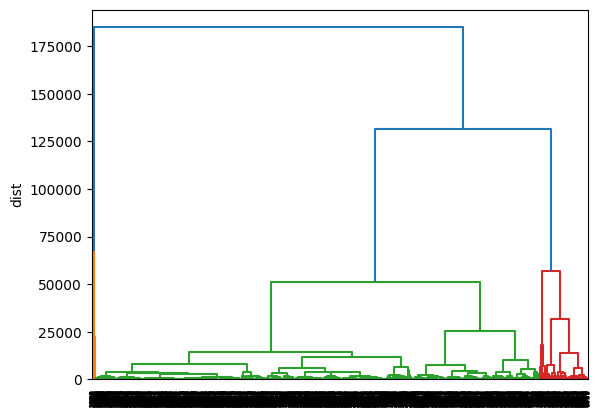

In [68]:
# 階層的クラスタリング
# 距離はEuclideanを採用
# 結合のアルゴリズムはWard's methodを選択

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

bank_df_val_sampled = bank_df_sampled.drop('y', axis=1)
hcls = linkage(bank_df_sampled, metric='euclidean', method='ward')
dendrogram(hcls)

plt.ylabel('dist')

In [69]:
# 顧客が所属するグループの確認

from scipy.cluster.hierarchy import fcluster

cst_group = fcluster(hcls, 50000, criterion='distance')
print(cst_group)

[4 5 4 ... 3 3 3]


#### 非階層型クラスタリング

単純にいくつかのグループに分割

#### $k$-means

距離情報を元に$k$個のグループに分割

グループ数は自分で設定

In [70]:
# k-meansで使用するライブラリを更新
# ↓のpipを実行したあとJupyter Notebookを再起動する必要があるかも

!pip install threadpoolctl


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [71]:
# k-meansの実行
# グループ数は10に設定

from sklearn.cluster import KMeans

kcls = KMeans(n_clusters=10)
cst_group = kcls.fit_predict(bank_df_sampled)

print(cst_group)

[9 7 0 ... 3 3 3]


Text(0, 0.5, 'balance')

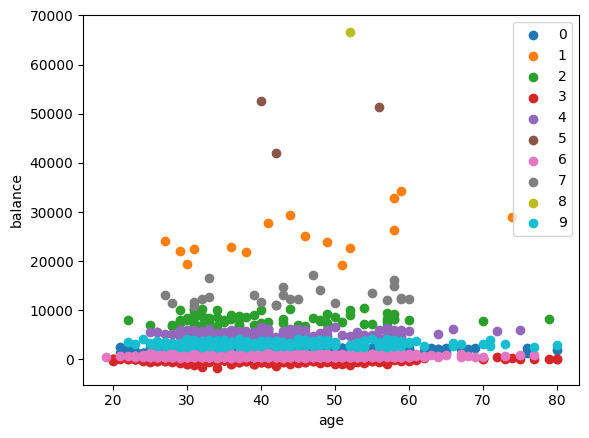

In [72]:
# ageとbalanceの散布図を作成
# そこにクラスタリングの結果で色分け

for i in range(10):
    labels = bank_df_sampled[cst_group==i]
    plt.scatter(labels['age'], labels['balance'], label=i)
    
plt.legend()
plt.xlabel('age')
plt.ylabel('balance')

In [73]:
# クラスタリングの結果を元のデータセットに結合

bank_df_sampled['group'] = cst_group
bank_df_sampled.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,feb,jan,jul,jun,mar,may,nov,oct,sep,group
27997,31,0,3283,0,0,2,258,1,73,1,...,True,False,False,False,False,False,False,False,False,9
39049,31,0,10884,0,0,10,294,3,98,2,...,False,False,False,False,False,False,False,False,False,7
39725,51,0,1416,0,0,9,345,1,-1,0,...,False,False,False,False,False,False,False,False,True,0
10394,40,0,106,0,0,17,676,2,-1,0,...,False,False,False,True,False,False,False,False,False,3
40826,36,0,203,0,0,25,255,1,88,1,...,False,True,False,False,False,False,False,False,False,3


In [74]:
# クラスタごとのデータ件数の分布

bank_df_sampled['group'].value_counts()

group
3    1486
6     725
0     349
9     196
4     128
2      71
7      25
1      16
5       3
8       1
Name: count, dtype: int64

In [75]:
# クラスタ0に属するデータの統計量を計算

bank_df_sampled[bank_df_sampled['group']==0].describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,group
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.0
mean,41.845272,0.002865,1817.527221,0.561605,0.111748,15.280802,255.237822,2.535817,34.048711,0.567335,0.146132,0.0
std,11.074155,0.053529,366.160606,0.496903,0.315508,8.114214,252.158893,2.706316,90.740158,1.941432,0.353745,0.0
min,21.000000,0.000000,1283.000000,0.000000,0.000000,1.000000,6.000000,1.000000,-1.000000,0.000000,0.000000,0.0
25%,33.000000,0.000000,1502.000000,0.000000,0.000000,8.000000,110.000000,1.000000,-1.000000,0.000000,0.000000,0.0
50%,40.000000,0.000000,1759.000000,1.000000,0.000000,16.000000,181.000000,2.000000,-1.000000,0.000000,0.000000,0.0
75%,50.000000,0.000000,2114.000000,1.000000,0.000000,21.000000,298.000000,3.000000,-1.000000,0.000000,0.000000,0.0
max,80.000000,1.000000,2527.000000,1.000000,1.000000,31.000000,1914.000000,32.000000,626.000000,27.000000,1.000000,0.0


### 潜在ニーズの抽出

契約してくれそうな顧客によく見られる特徴を抽出

#### 主成分分析 (Principal Component Analysis; PCA)

データの散らばり具合が大きい方向に順次軸を取り直し

In [76]:
# PCAの実行

from sklearn.decomposition import PCA

pca = PCA()
bank_df_pca = pca.fit_transform(bank_df_val_sampled)

print(pca.explained_variance_ratio_)
print(bank_df_pca.shape)

[9.92624405e-01 6.39713903e-03 9.61018645e-04 9.72165072e-06
 6.18777408e-06 8.95751634e-07 3.12090348e-07 5.16428420e-08
 4.04364112e-08 3.20549810e-08 2.31680736e-08 2.18135734e-08
 1.60310061e-08 1.42459565e-08 1.24291716e-08 1.21337744e-08
 1.11224908e-08 1.02599112e-08 9.14071761e-09 8.88906812e-09
 8.12112885e-09 7.37079794e-09 6.61540400e-09 5.14877813e-09
 4.34149347e-09 4.16824726e-09 3.20495060e-09 3.07611671e-09
 2.62094542e-09 2.50955953e-09 2.09154789e-09 1.59374793e-09
 1.54415596e-09 1.37723857e-09 1.20406633e-09 1.12456941e-09
 1.94396882e-10 1.02783172e-22 1.01584774e-23 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
(3000, 42)


Text(0, 0.5, '2nd')

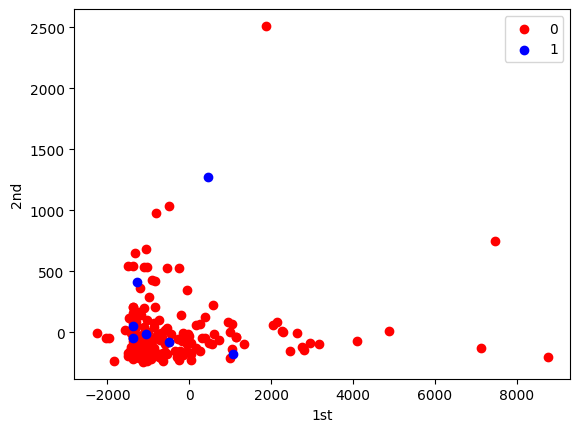

In [77]:
# 第1/第2主成分の分布
# y=1が契約した人 (青色で表示)

import matplotlib.pyplot as plt

y = bank_df_sampled['y']

bank_df_pca = pd.DataFrame(bank_df_pca)
bank_df_pca['y'] = y

bank_df_pca_0 = bank_df_pca[bank_df_pca['y']==0]
bank_df_pca_0 = bank_df_pca_0.drop('y', axis=1)
plt.scatter(bank_df_pca_0[0], bank_df_pca_0[1], c='red', label=0)

bank_df_pca_1 = bank_df_pca[bank_df_pca['y']==1]
bank_df_pca_1 = bank_df_pca_1.drop('y', axis=1)
plt.scatter(bank_df_pca_1[0], bank_df_pca_1[1], c='blue', label=1)

plt.legend()
plt.xlabel('1st')
plt.ylabel('2nd')